In [5]:
from game import *
from policy import *
from simulator import *

# Benchmark

In [6]:
Evaluator(policy=Benchmark()).evaluate(num_episodes=100000)

100%|██████████| 100000/100000 [00:02<00:00, 40749.81it/s]


-0.1023

# MC Bootstrap

In [7]:
mc_policy = Easy21Policy()
mc_simulator = MonteCarloSimulator(policy=mc_policy)
mc_simulator.run(num_episodes=100000)

100%|██████████| 100000/100000 [01:40<00:00, 998.47it/s]


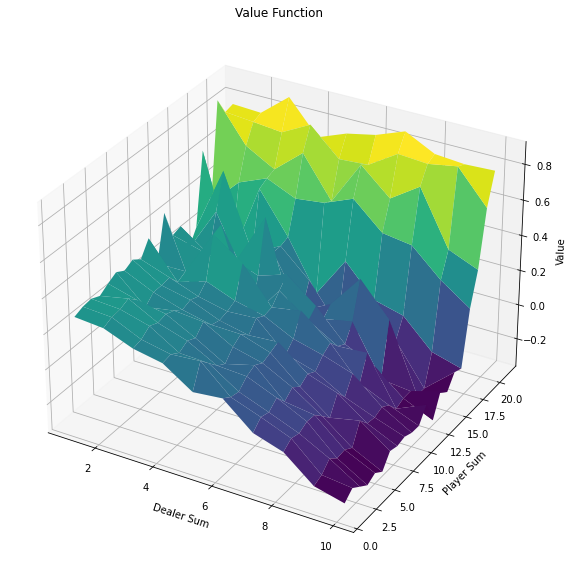

In [8]:
mc_policy.plot_value_function()

In [9]:
Evaluator(policy=mc_policy).evaluate(num_episodes=100000)

100%|██████████| 100000/100000 [00:03<00:00, 26532.24it/s]


0.05119

# SARSA Bootstrap

In [10]:
sarsa_policy = Easy21Policy()
sarsa_simulator = SARSALambdaSimulator(policy=sarsa_policy, lambda_=0.5)
sarsa_simulator.run(num_episodes=50000)

100%|██████████| 50000/50000 [00:03<00:00, 15629.88it/s]


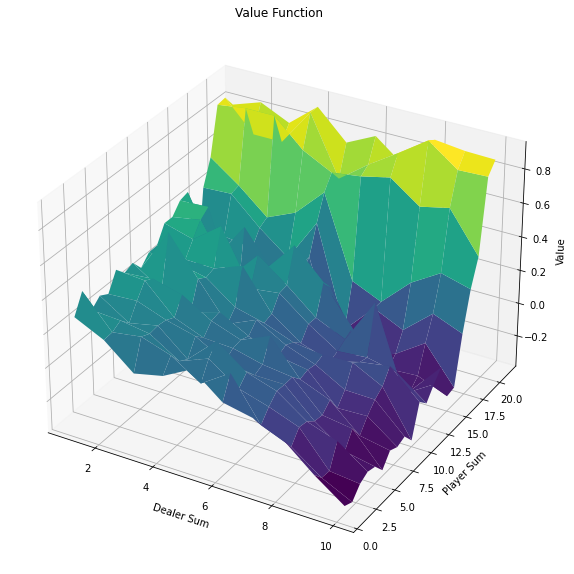

In [11]:
sarsa_policy.plot_value_function()

In [12]:
Evaluator(policy=sarsa_policy).evaluate(num_episodes=100000)

100%|██████████| 100000/100000 [00:03<00:00, 25906.73it/s]


0.04747

# Linear Approximation

In [13]:
approx_model = Easy21ActionValueApproximation()
approx_simulator = ApproximationSimulator(
    model=approx_model, lambda_=0.5, learning_rate=0.001
)
approx_simulator.run(num_episodes=100000)

100%|██████████| 100000/100000 [00:28<00:00, 3526.96it/s]


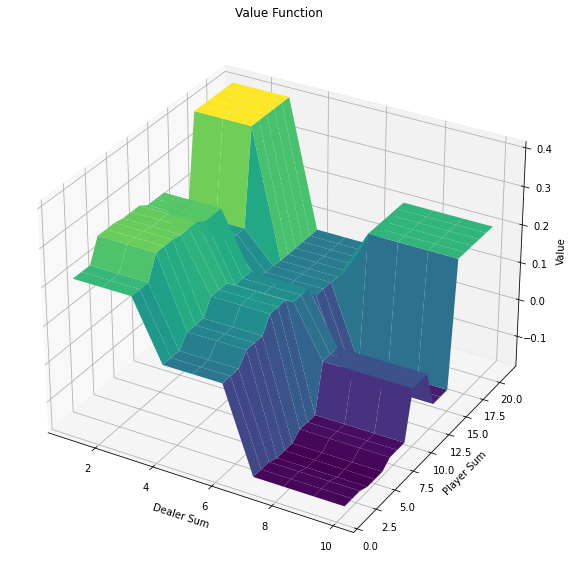

In [14]:
approx_model.plot_value_function()

In [15]:
Evaluator(policy=approx_model).evaluate(num_episodes=100000)

100%|██████████| 100000/100000 [00:12<00:00, 8258.32it/s]


0.05691

# REINFORCE

In [31]:
policy_approx_model = Easy21PolicyApproximation()
reinforce_simulator = REINFORCESimulator(model=policy_approx_model, learning_rate=0.01)
reinforce_simulator.run(num_episodes=100000)

100%|██████████| 100000/100000 [02:13<00:00, 747.69it/s]


In [32]:
Evaluator(policy=policy_approx_model).evaluate(num_episodes=100000)

100%|██████████| 100000/100000 [00:07<00:00, 12577.03it/s]


0.05227

# Actor-Critic

In [28]:
actor_model = Easy21PolicyApproximation()
critic_model = Easy21ActionValueApproximation()
actor_critic_simulator = ActorCriticSimulator(
    actor_model=actor_model,
    critic_model=critic_model,
    lambda_=0.5,
    actor_learning_rate=0.01,
    critic_learning_rate=0.001,
)
actor_critic_simulator.run(num_episodes=100000)

100%|██████████| 100000/100000 [00:52<00:00, 1915.64it/s]


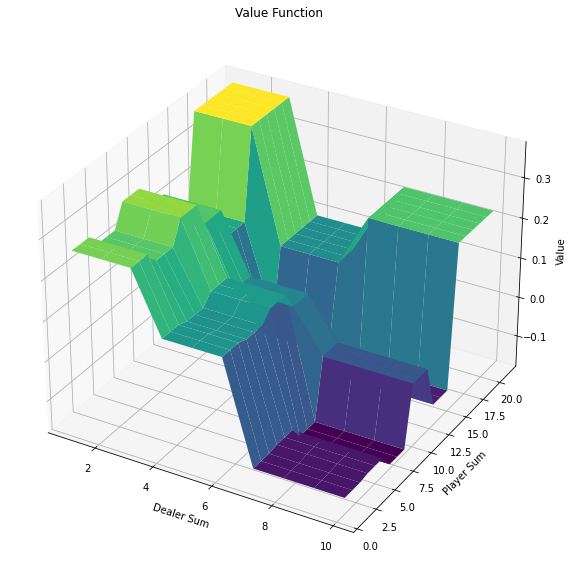

In [29]:
critic_model.plot_value_function()

In [30]:
Evaluator(policy=actor_model).evaluate(num_episodes=100000)

100%|██████████| 100000/100000 [00:09<00:00, 10603.33it/s]


0.05441

# Advantage

In [21]:
advantage_actor_model = Easy21PolicyApproximation()
advantage_critic_model = Easy21StateValueApproximation()
advantage_simulator = AdvantageSimulator(
    actor_model=advantage_actor_model,
    critic_model=advantage_critic_model,
    lambda_=0,
    actor_learning_rate=0.01,
    critic_learning_rate=0.01,
)
advantage_simulator.run(num_episodes=100000)

100%|██████████| 100000/100000 [00:45<00:00, 2217.98it/s]


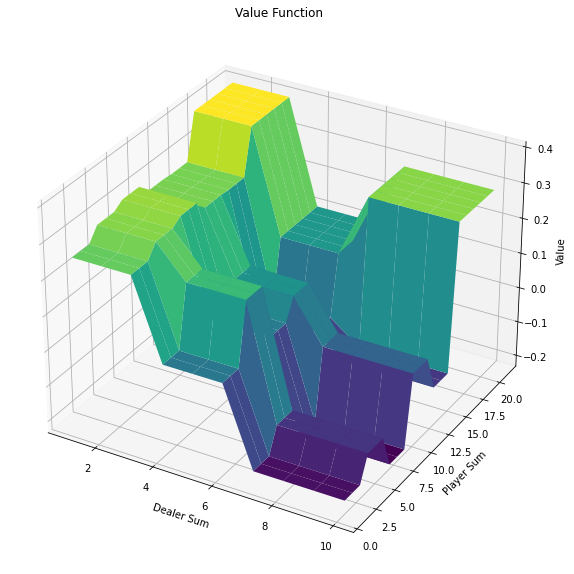

In [22]:
advantage_critic_model.plot_value_function()

In [23]:
Evaluator(policy=advantage_actor_model).evaluate(num_episodes=10000)

100%|██████████| 10000/10000 [00:00<00:00, 12658.23it/s]


0.0594

# PPO

In [24]:
from game import *
from policy import *
from simulator import *

In [25]:
ppo_actor_model = Easy21PolicyApproximation()
ppo_critic_model = Easy21StateValueApproximation()
ppo_simulator = PPOSimulator(
    actor_model=ppo_actor_model,
    critic_model=ppo_critic_model,
    lambda_=0,
    actor_learning_rate=0.01,
    critic_learning_rate=0.01,
    epsilon = 0.2,
    actor_iterations = 3,
    critic_iterations = 3,
)
ppo_simulator.run(num_episodes=100000)

100%|██████████| 100000/100000 [05:41<00:00, 292.40it/s]


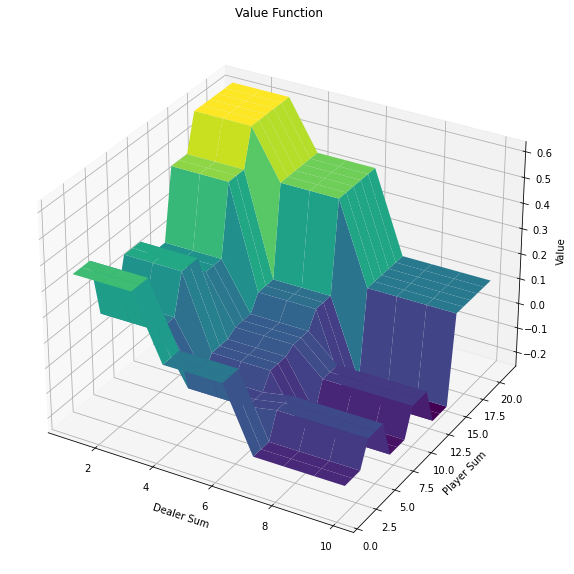

In [26]:
ppo_critic_model.plot_value_function()

In [27]:
Evaluator(policy=ppo_actor_model).evaluate(num_episodes=10000)

100%|██████████| 10000/10000 [00:00<00:00, 11904.76it/s]


0.0502